$$
\Large{\textbf{TP Optimisation - 2023}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Remove noise from a signal

#### Question 1 :

Nous voulons réécrire $f(x) = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2 + \frac{\lambda}{2}\sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$ comme 
$\frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$, où $D \in \mathcal{M}_N(\mathbb{R})$.

Le premier terme est évident, car $\frac{1}{2}|| x - y ||^2 = \frac{1}{2}\sum_{i=1}^N(x_i-y_i)^2$.
Pour le deuxième terme, en prenant :
\begin{equation}
D = 
\begin{pmatrix}
-1&1&0&0&...&0 \\ 0&-1&1&0&...&0 \\ &&...&...&\\ 0&...&0&-1&1&0 \\ 0&...&0&0&-1&1 \\ 0&0&0&0&0&0
\end{pmatrix},
\end{equation}
On obtient : $||Dx||^2 = \sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$, en prenant $||\cdot||^2$ comme la norme euclidienne usuelle.

In [43]:
def D_mat(N):
    D = np.diag(-1*np.ones(N))
    for i in range(N-1):
        D[i,i+1] = 1
    D[N-1,N-1]=0
    return D

#### Question  2 :

La fonction $||\cdot||$ est différentiable, donc par somme de fonctions différentiables, $f(x) = \frac{1}{2}|| x - y ||^2 + \frac{\lambda}{2}||Dx||^2$ est bien différentiable.

Calcul du gradient : 

Soit $h \in \mathbb{R}^N$.

\begin{align}
f(x+h) &= \frac{1}{2}||x+h-y||^2+\frac{\lambda}{2}||D(x+h)||^2 \\
&= f(x) + \frac{1}{2} \bigg( \langle x-y,h \rangle + \langle h,x-y \rangle + ||h||^2 \bigg) + \frac{\lambda}{2} \bigg( \langle Dx,Dh\rangle + \langle Dh,Dx \rangle + ||Dh||^2 \bigg) \\
&= f(x) + \langle x-y,h \rangle + \lambda\langle Dx, Dh \rangle + \text{o}(||h||^2), \\
\text{D'où} \,\, f(x+h) &= f(x) + \langle x-y + \lambda D^TDx , h \rangle + \text{o}(||h||^2).
\end{align}

Donc on obtient $\nabla f(x) = x-y+\lambda D^TDx = \big(I_d - D^TD\big)x - y$.

In [44]:
def f(x):
    N = x.shape[0]
    return 1/2*np.linalg.norm(x-y) + lamb/2*np.linalg.norm(D_mat(N)@x)

In [45]:
def grad_f(x):
    N=x.shape[0]
    I = np.eye(N)
    return x + lamb*(D_mat(N).T@D_mat(N))@x - y

#### Question 3 :

In [46]:
N = 100

In [47]:
def generate_signal(N,sigma=0.05):
    
    t = np.linspace(0,1,N)
    t1 = 0.1+0.25*np.random.random()
    t2 = 0.35+0.25*np.random.random()
    yi = np.array([-0.1,0.8,0.2])
    
    y = np.zeros(N)
    
    for i in range(y.size):
        if t[i]<=t1:
            y[i]=yi[0]
        elif t[i]>t1 and t[i]<=t2:
            y[i] = yi[1]
        else:
            y[i] = yi[2]
    
    y += sigma*(2*np.random.random(y.size)-1)
    
    return t,y

In [48]:
t, y = generate_signal(N)

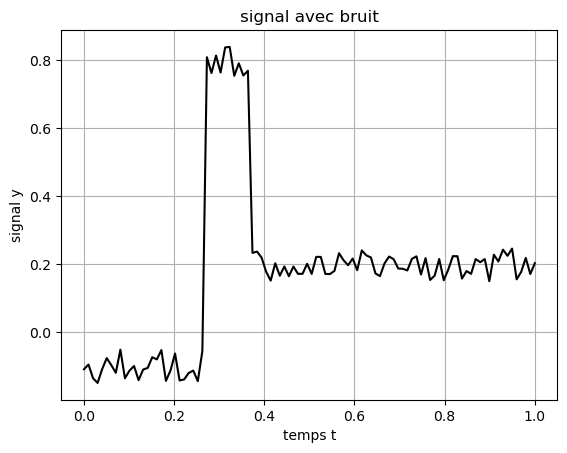

In [49]:
plt.plot(t, y, 'k-')
plt.grid(True)
plt.ylabel('signal y')
plt.xlabel('temps t')
plt.title('signal avec bruit');
plt.show()

#### Question 4 :

In [50]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f(x)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f(x)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

#### Question 5 :

In [57]:
lamb = 1
x0 = y
alpha = 0.2

In [59]:
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

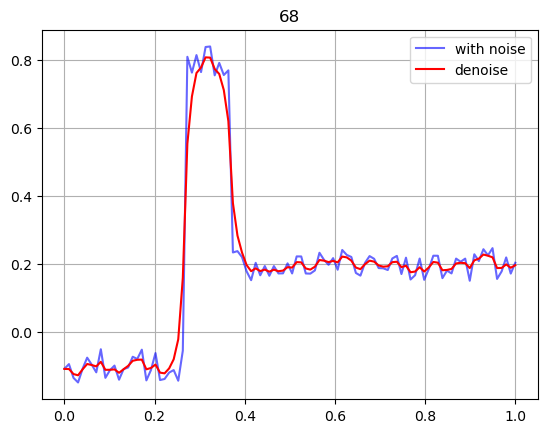

In [64]:
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'denoise')
plt.title(it)
plt.legend()
plt.grid(True)

#### Question 6 :

Nous pouvons tracer la fonction "nombre d'itérations" en fonction de $\alpha$, afin de trouver le $\alpha$ optimal:

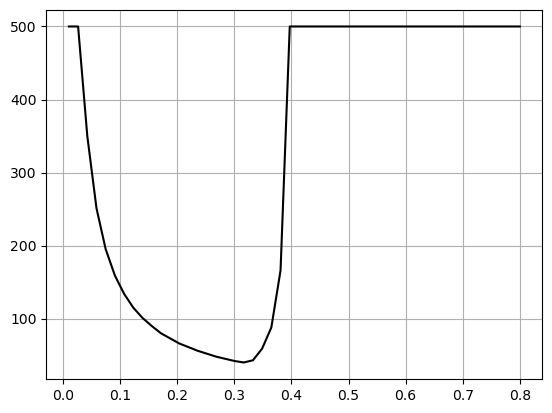

In [70]:
alphaa = np.linspace(0.01,0.8,50)
Nbriterations = []
for alpha in alphaa:
    y_denoise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)
    Nbriterations.append(it)
plt.plot(alphaa, Nbriterations, 'k-')
plt.grid(True)
plt.show()

On observe donc une valeur optimale de $\alpha$ environ égale à 0.32.

In [65]:
### Observons ce qu'il se passe lorsque alpha = 0.5, pour lambda = 1:

In [140]:
lamb, alpha = 1, 0.5
y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-8, 500)

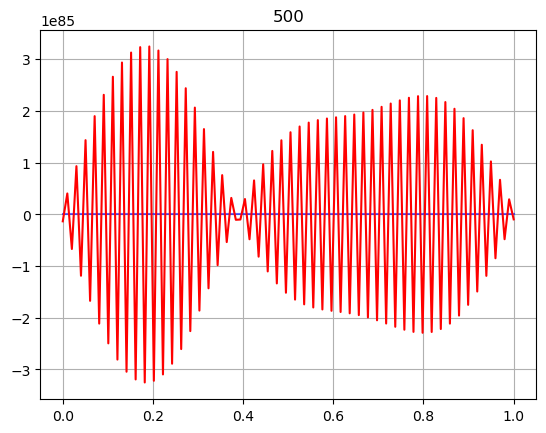

In [141]:
plt.plot(t, y, 'b-', label = 'with noise', alpha = .6)
plt.plot(t, y_non_noise, 'r-', label = 'without noise')
plt.title(it)
plt.grid(True)

Ce résultat est attendu. En effet, d'après les observations précédentes sur alpha, on remarque que (à $\lambda = 1$ fixé) si $\alpha \geq 0.4$, alors le nombre d'itérations dépasse 500 et donc notre modèle ne converge pas.

Nous pouvons aussi faire un lien avec le cours: la théorie assure que $0 \leq \alpha \leq \frac{2}{M},$ $J$ étant de gradient Lipschitz de constante $M$, ie 
$$
\forall (x,y) \in \mathbb{R}^{n\times n}, \,\,\, ||\nabla J(x) - \nabla J(y)|| \leq M ||x - y||
$$

In [145]:
M=np.sum(np.abs(np.eye(N) + lamb*D_mat(N).T@D_mat(N)))/N
2/M

0.40322580645161293

Théoriquement, il faut donc que alpha soit plus petit que 0.4 pour qu'il y ai convergence. C'est en accord avec ce que l'on retrouve graphiquement.

#### Question 7 :

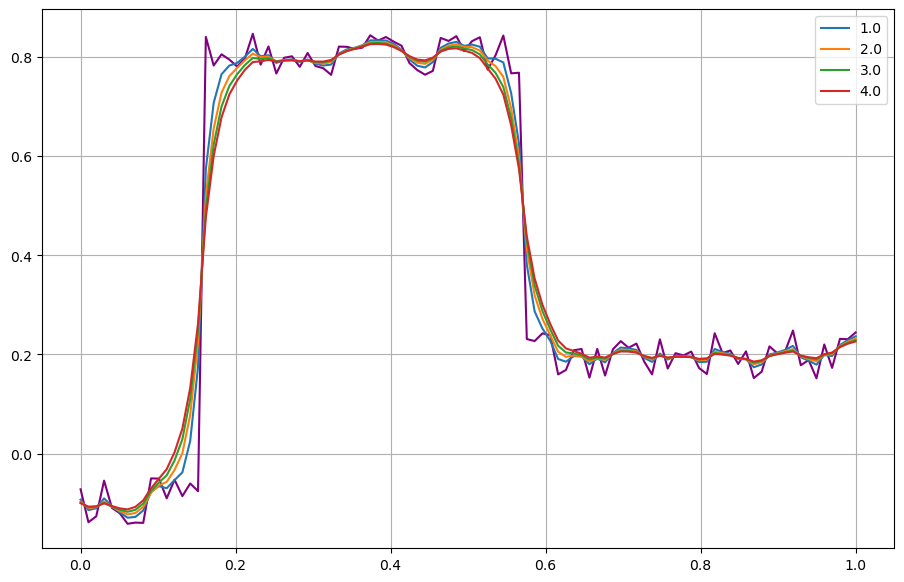

In [15]:
lamb = np.linspace(1,4,4)
alpha = 0.1
fig = plt.figure(figsize = (11,7))
plt.plot(t,y, color = 'purple')
for l in lamb:
    lamb = l
    y_non_noise, it, cvg = gradient_met(grad_f, x0, alpha, 1e-5, 500)
    plt.plot(t, y_non_noise, label = l)
plt.grid(True)
plt.legend()
plt.show()

Observations : On remarque que plus lambda augmente, moins il y a de bruit.

#### Question 8 :

Pour calculer le gradient de cette nouvelle fonction $f_{\mu}$, nous allons raisonner avec les dérivées partielles, une à une.
Premièrement, ces dérivées partielles existent, (à développer).

Calcul des dérivées partielles:

soit $l \in \{2,...,N-1\}$. Alors :
$$
\frac{\partial f(x)}{\partial x_l} = x_l - y_l - \lambda \frac{x_{l+1} - x_l}{\sqrt{(x_{l+1}-x_l)^2+\mu^2}} + \lambda\frac{x_l-x_{l-1}}{\sqrt{(x_l-x_{l-1})^2+\mu^2}}
$$
Pour $l = N$ :
$$
\frac{\partial f(x)}{\partial x_N} = x_N - y_N + \lambda \frac{x_{N} - x_{N-1}}{\sqrt{(x_{N}-x_{N-1})^2+\mu^2}}
$$
Enfin, pour $l=1$:
$$
\frac{\partial f(x)}{\partial x_1} = x_1 - y_1 - \lambda \frac{x_{2} - x_{1}}{\sqrt{(x_{2}-x_{1})^2+\mu^2}}
$$
Au total, on obtient : 
$$
\nabla f_{\mu}(x) = \bigg(\frac{\partial f(x)}{\partial x_i} \bigg)_{i=1,...,N}.
$$

In [16]:
def grad_f_mu(x, mu):
    
    N = x.shape[0]
    gradf = np.zeros(N)
    
    for i in range(1,N-1):
        gradf[i] = x[i] - y[i] - lamb*(x[i+1]-x[i])/np.sqrt((x[i+1]-x[i])**2 + mu**2) + lamb*(x[i]-x[i-1])/np.sqrt((x[i]-x[i-1])**2 + mu**2)
    
    gradf[0] = x[0] - y[0] - lamb*(x[1]-x[0])/np.sqrt((x[1]-x[0])**2 + mu**2)
    gradf[N-1] = x[N-1] - y[N-1] + lamb*(x[N-1]-x[N-2])/np.sqrt((x[N-1]-x[N-2])**2 + mu**2)
    
    return gradf

#### Question 9 :

In [17]:
def gradient_met_mu(grad_f_mu, x0, mu, alpha, eps, Nmax):

    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    alpha the step (constant)
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    
    x = x0
    gradf = grad_f_mu(x, mu)
    iters = 0
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        x = x - alpha*gradf
        gradf = grad_f_mu(x, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    
    return x, iters, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [153]:
x0 = y
alpha = 0.001
lamb = 1
y_new, n, cvg = gradient_met_mu(grad_f_mu, x0, 1e-2, alpha, 1e-4,500)

Text(0.5, 1.0, '500')

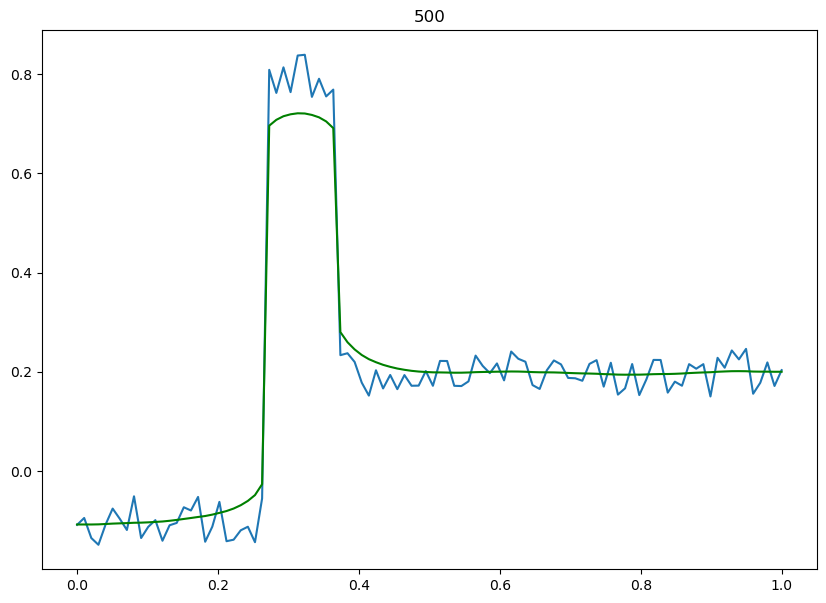

In [154]:
#plt.plot(t,y_non_noise, 'b-')
fig = plt.figure(figsize=(10,7))
plt.plot(t,y)
plt.plot(t,y_new, 'g-')
plt.title(it)

La deuxième méthode lisse beaucoup plus le signal, mais ne converge pas. Plus efficace

#### Question 10 :

In [20]:
def BBstep(grad_f, x, xm1) :
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization point x_0
    xm1 the initialization point x_-1
    """
    bbs = (x-xm1).T@(grad_f(x)-grad_f(xm1))/np.linalg.norm(grad_f(x)-grad_f(xm1))**2
    
    return bbs # the step in the method of Barzilai-Borwein

In [21]:
def barzilai_borwein(grad_f, x0, eps, Nmax):
    """
    grad_f a function that compute the gradient of f given x
    x0 the initialization
    eps the precision (stop criteria)
    Nmax the maximum number of iterations
    """
    x = x0
    xm1 = -x0
    
    gradf = grad_f(x)
    iters = 0
    alpha = BBstep(grad_f, x, xm1)
    
    while np.linalg.norm(gradf) > eps and iters < Nmax: #critere d’arret sur le gradient
        xm1 = x
        x = xm1 - alpha*grad_f(xm1)
        gradf = grad_f(x)
        alpha = BBstep(grad_f, x, xm1)
        iters += 1
    
    cvg = np.linalg.norm(gradf) <= eps #on verifie si on a convergence
    n = iters
    
    return x, n, cvg # returns
                    # x the minimum,
                    # n the number of iterations
                    # cvg a boolean that indicates if the algorithm has converged

In [34]:
x0 = y
lamb = 4

y_1, n3, cvg3 = barzilai_borwein(grad_f, x0, 1e-8, 100)
n3, cvg3

(54, True)

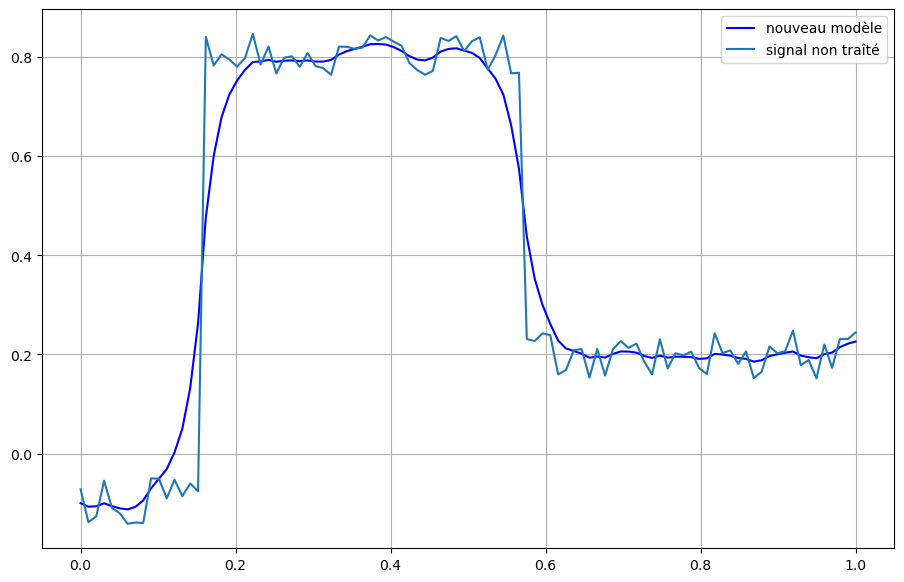

In [35]:
fig = plt.figure(figsize = (11,7))
plt.plot(t,y_1,'b-', label = 'nouveau modèle')
plt.plot(t,y, label = 'signal non traîté')
plt.grid(True)
plt.legend()

Méthode de gradient à pas optimal, la descente est plus précise et plus rapide, on s'attend théoriquement à un meilleur résultat que précédemment.

***

***

# Exercice 2 : Remove noise from an image

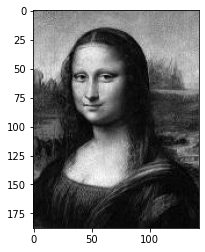

In [24]:
# Pour l'ordi portable

from matplotlib.image import imread
image = imread("C:/Users/emari/Desktop/MASTER_1_SORBONNE/SEMESTRE_2/Grey_Mona_lisa.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

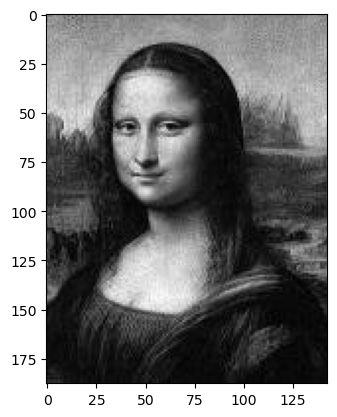

In [155]:
# Pour l'ordi de la maison

from matplotlib.image import imread
image = imread("C:/Users/Emilio/Documents/Projet master/Grey_Mona_lisa.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

#plot with grey levels
plt.imshow(imageArray, cmap='gray')

g=imageArray.copy()

***

#### Question 1 :

$\forall u \in \mathbb{R}^{m \times n}$
\begin{cases}
\delta_x(u) = D_x u \\
\delta_y(u) = u D_y
\end{cases}
avec $D_x \in \mathcal{M}_m(\mathbb{R})$ et $ D_y\in \mathcal{M}_n(\mathbb{R})$

In [166]:
def delta_x(u): # like the matrix D above, in the first exercise, but for the x direction
    m, n = u.shape[0], u.shape[1]
    delt = -1*np.eye(m)

    for i in range(m-1):
            delt[i,i+1] = 1
    delt[m-1,m-1] = 0
    return delt

def delta_y(u):
    m, n = u.shape[0], u.shape[1]
    delt = -1*np.eye(n)

    for i in range(n-1):
            delt[i,i+1] = 1
    delt[n-1,n-1] = 0
    return delt.T

In [167]:
m = g.shape[0]
n = g.shape[1]

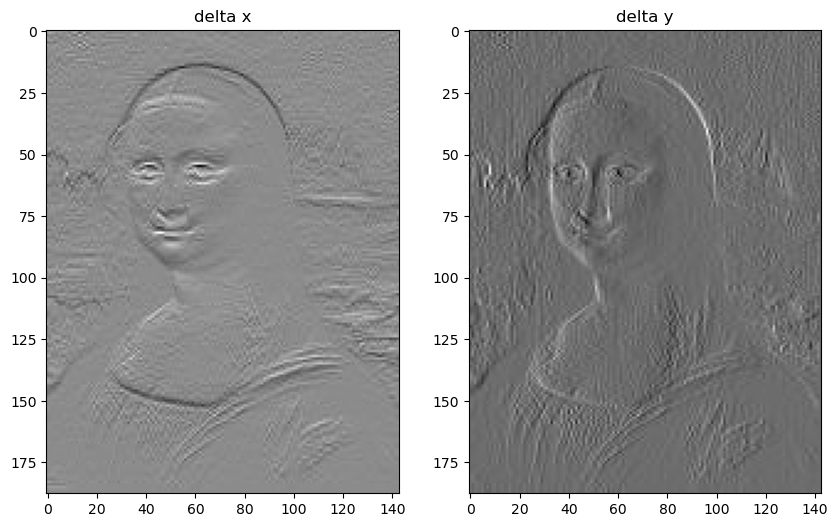

In [168]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,25))
ax1.imshow(delta_x(g)@g,cmap='gray')
ax1.set_title("delta x")
ax2.imshow(g@delta_y(g),cmap='gray')
ax2.set_title("delta y")
plt.show()

***

#### Question 2 :

In [169]:
def M_mat(u): return np.sqrt((delta_x(u)@u)**2 + (u@delta_y(u))**2)

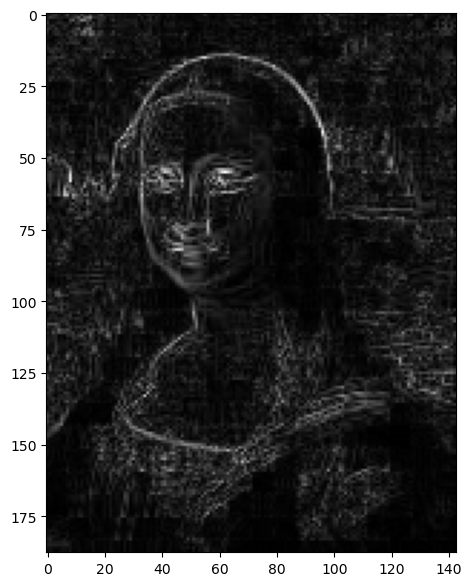

In [170]:
fig = plt.figure(figsize=(12,7))
plt.imshow(M_mat(g), cmap='gray')

##### Remarques :
Après traîtement du dessus, l'image s'affiche en noir et blanc, il n'y a plus de nuances de gris.  

***

#### Question 3 :

Pour la descente de gradient, nous allons avoir besoin du gradient de $||\nabla^d(v)||$, pour $v$ une image.

On cherche à minimiser $J(v) = \frac{1}{2}|| v - g ||^2 + \frac{\lambda}{2} ||\nabla^d(v)||^2$, $v \in \mathbb{R}^{m\times n}$.

On peut écrire :
$$
||\nabla ^d(v)|| = ||\delta_x(u)||^2 + ||\delta_y(u)||^2 
$$
D'où $\nabla ||\nabla ^d(v)|| = 2D_x^TD_xu + 2 u D_y D_y^T$

Ainsi, on obtient une formule explicite du gradient :
$$
\nabla J(v) = v - g + \lambda \big( D_x^TD_xu + u D_y D_y^T \big)
$$

In [192]:
def grad_J(v): # the gradient of the function J
    return  v - g + lamb*(delta_x(v).T@delta_x(v)@v + v@delta_y(v)@delta_y(v).T)

In [186]:
def grad_met_im(grad_J, v0, alpha, eps = 1e-3, Nmax = 500):
    """
    grad_J a function that compute the gradient of J given v, the image. (m,n)-matrix
    v0 the initialization, (m,n)-matrix
    alpha the step (constant)
    """
    v = v0
    gradj = grad_J(v)
    iters = 0

    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        v = v - alpha*gradj
        gradj = grad_J(v)
        iters += 1
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence

    return v, iters, cvg
    

Il peut être intéressant de comparer comme dans l'exercice 1, à $\lambda$ fixé, la valeur maximale que peut prendre alpha pour qu'il y ait convergence.

In [189]:
lamb = 3
v0 = np.zeros((m,n))

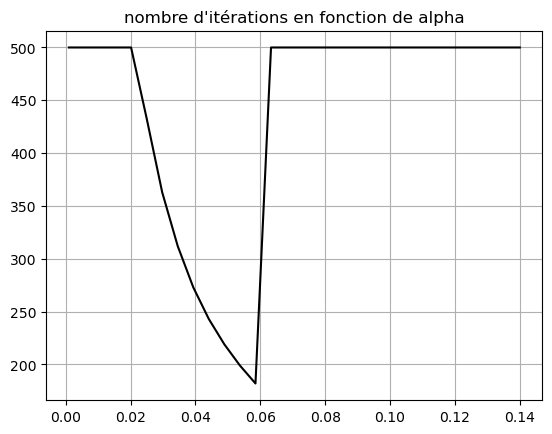

In [205]:
alphaa = np.linspace(0.001, 0.14, 30)
Nbriterations = []
for alpha in alphaa:
    y=g_denoise, it, cvg = grad_met_im(grad_J, v0, alpha)
    Nbriterations.append(it)
plt.plot(alphaa, Nbriterations, 'k-')
plt.grid(True)
plt.title("nombre d'itérations en fonction de alpha")
plt.show()

Maintenant, on calcule la valeur $2/M$, valeur maximale que peux prendre $\alpha$ théoriquement:

In [267]:
M=np.sum(np.abs(np.eye(g.shape[0]) + lamb*delta_x(g).T@delta_x(g)))/m + np.sum(np.abs(lamb*delta_y(g)@delta_y(g).T))/n
2/M

0.04498634964487324

Les valeurs correspondent parfaitement.

Comparons maintenant les différents résultats pour des $\lambda$ différents :

In [204]:
lambdaa = np.linspace(0.1,4,6)
alpha = [1.109, 0.20, 0.109, 0.073, 0.0591, 0.045 ] ### toutes les valeurs à peu près optimales de alpha pour chaque lambda ci-dessus
v0 = np.zeros((m,n))

lamb=lambdaa[0]
g_new1, it1, cvg = grad_met_im(grad_J, v0, alpha[0])
lamb = lambdaa[1]
g_new2, it2, cvg = grad_met_im(grad_J, v0, alpha[1])
lamb=lambdaa[2]
g_new3, it3, cvg = grad_met_im(grad_J, v0, alpha[2])
lamb=lambdaa[3]
g_new4, it4, cvg = grad_met_im(grad_J, v0, alpha[3])
lamb=lambdaa[4]
g_new5, it5, cvg = grad_met_im(grad_J, v0, alpha[4])
lamb=lambdaa[5]
g_new6, it6, cvg = grad_met_im(grad_J, v0, alpha[5])

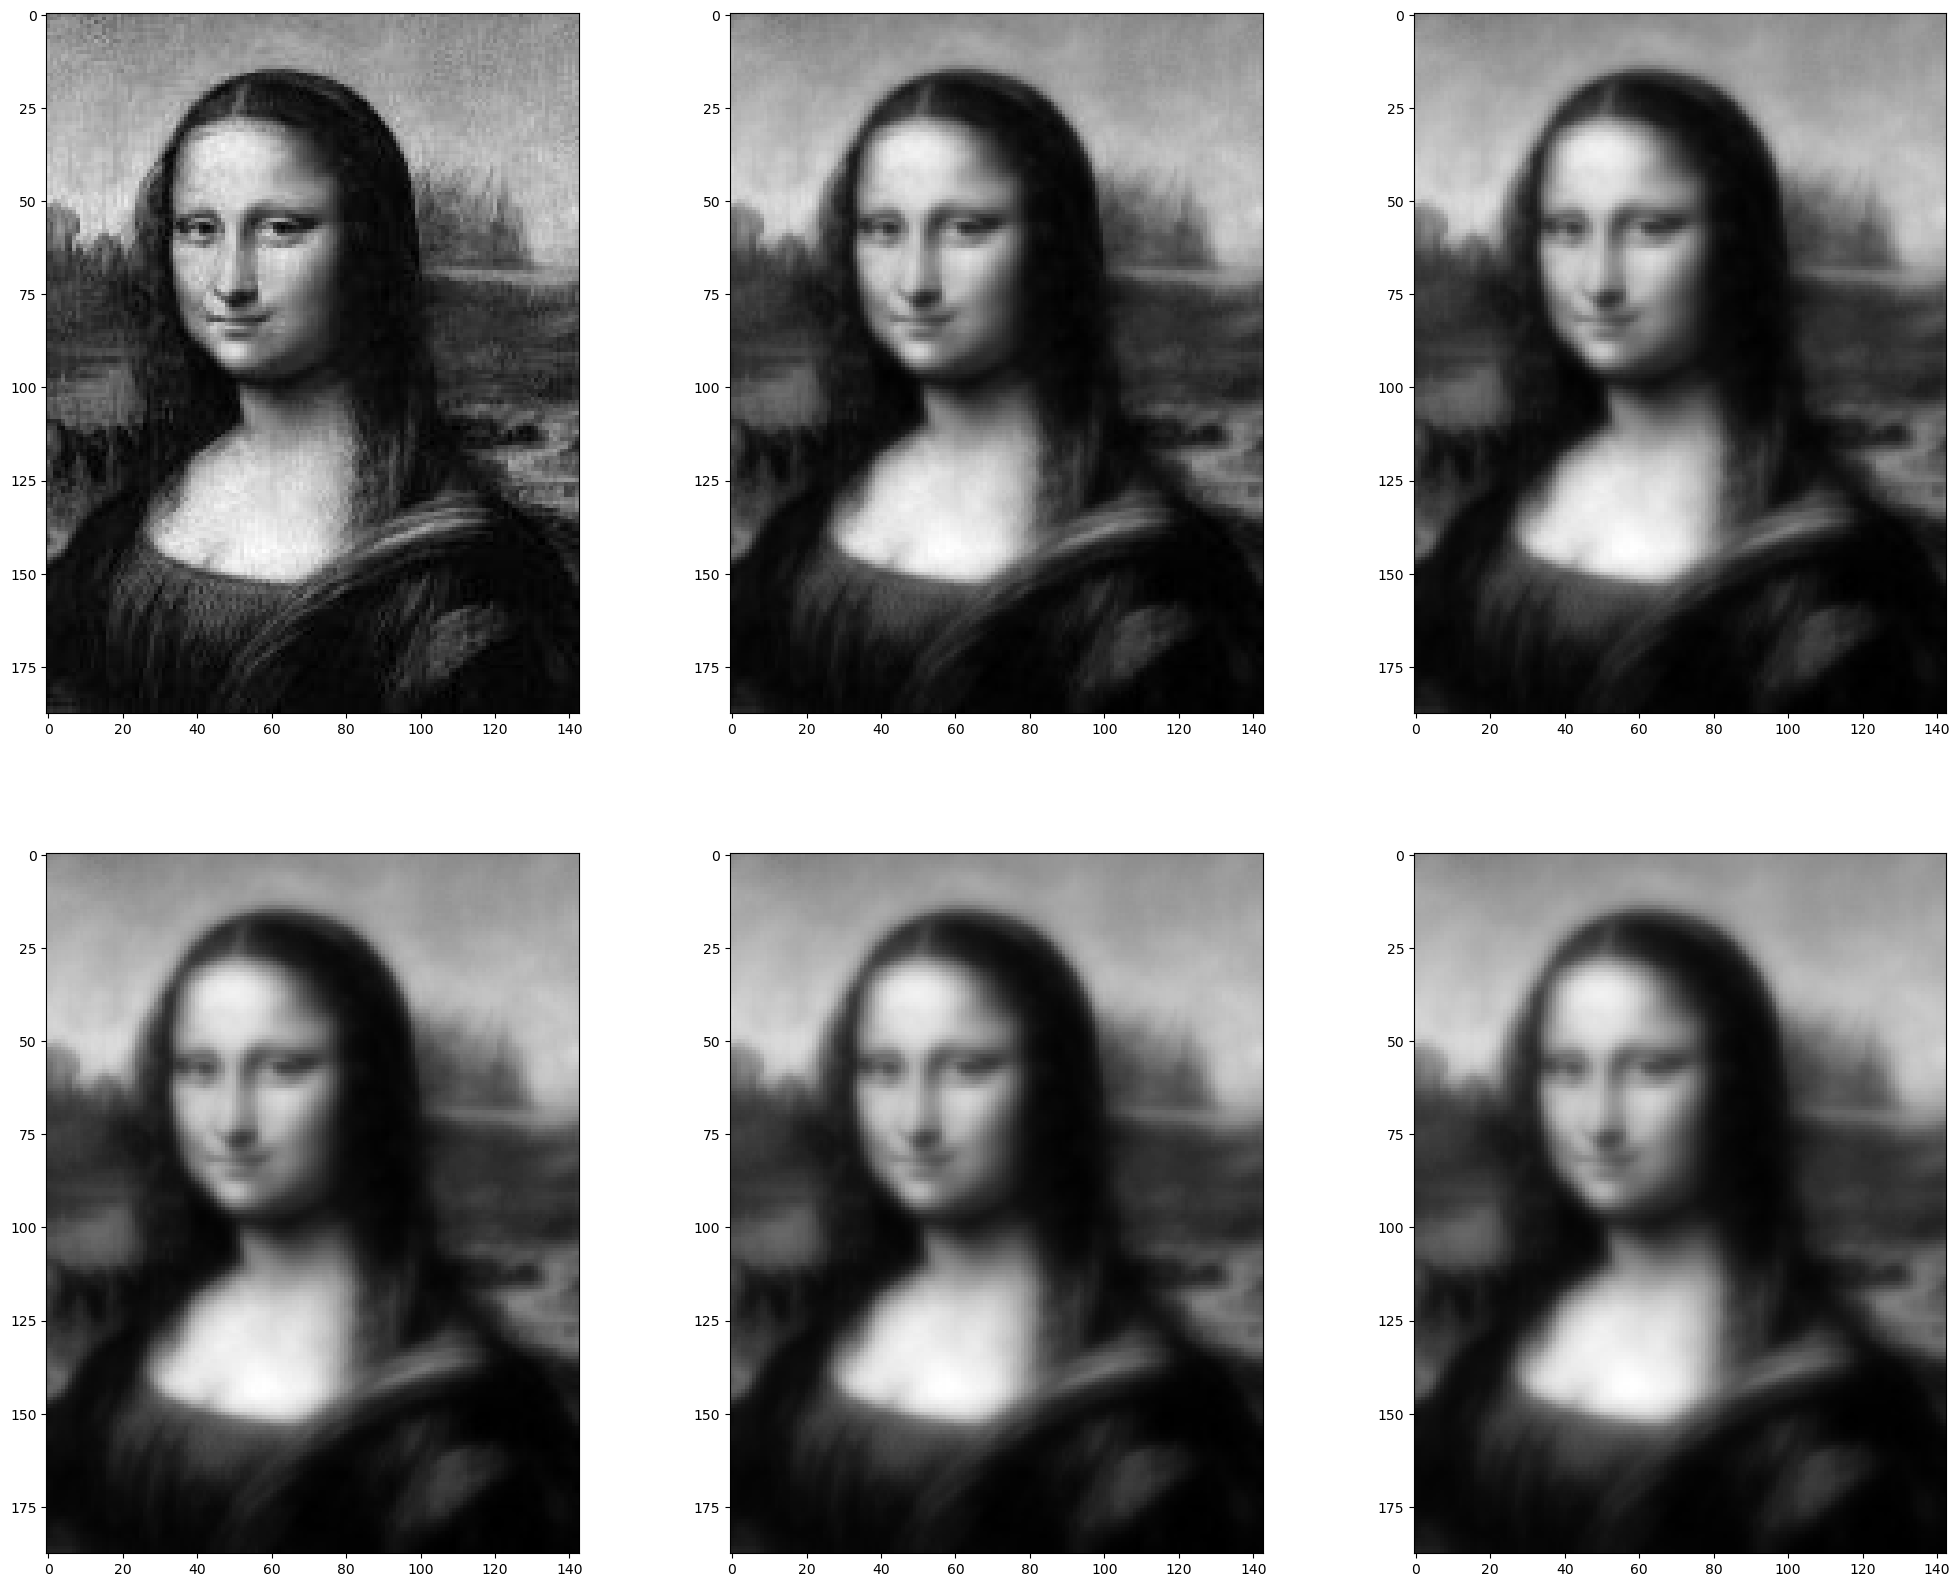

In [214]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2,figsize=(25,20))

ax1.imshow(g_new1, cmap='gray')
ax2.imshow(g_new2, cmap='gray')
ax3.imshow(g_new3, cmap='gray')
ax4.imshow(g_new4, cmap='gray')
ax5.imshow(g_new5, cmap='gray')
ax6.imshow(g_new6, cmap='gray')

#### Remarques :

Lorsque l'on augmente $\lambda$, l'image devient de plus en plus lisse, ce qui la rend visuellement flou. Le bruit est de plus bien traîté à partir de $\lambda = 2$. On peut cependant parler de "sur-lissage" pour $\lambda = 5$ par exemple.

***

#### Question 4 :

Gradient de $J$ pour le cas où on rajoute un terme $\mu$ dans le fonction $J$:

La fonction J devient :
$$J_{\mu}(v) = \frac{1}{2} ||v - g||^2 + \frac{\lambda}{2}||\nabla^d(v),\mu||^2.$$

On peut définir $ \forall (u,v), \,\, ||u,v||_2 = ||u||_2 + ||v||_2$ une norme.

Ainsi, on peut calculer $||\nabla^d(v)||_2 = ||\delta_x(v),\delta_y(v)||_2 = ||\delta_x(v)||_2 + ||\delta_y(v)||_2$,

et donc de même, $||\nabla^d(v),\mu|| = ||\delta_x(v)+\mu, \delta_y(v)+\mu|| = ||\delta_x(v)+\mu||_2 + ||\delta_y(v)+\mu||_2$

Finalement, on obtient : 
$$
\nabla||\nabla^d(v),\mu|| = \dfrac{\delta_x(v)}{\sqrt{\delta_x(v)^2+\mu^2}} + \dfrac{\delta_y(v)}{\sqrt{\delta_y(v)^2+\mu^2}}  + ... + \text{à finir.}
$$

In [215]:
def grad_J_mu(u, mu):
    
    m=u.shape[0]
    n=u.shape[1]
    mat_grad = np.zeros((m,n))
    
    first_term = -u@delta_y(u)/np.sqrt((u@delta_y(u))**2 + mu**2) 
    
    mat_2 = np.concatenate((np.zeros((m,1)),np.delete(u@delta_y(u),-1,1)),axis = 1)
    sec_term = mat_2/np.sqrt(mat_2**2+mu**2)
    
    third_term = -delta_x(u)@u/np.sqrt((delta_x(u)@u)**2+mu**2)
    
    mat_4 = np.concatenate((np.zeros((1,n)), np.delete(delta_x(u)@u,-1,0)), axis = 0)
    four_term = mat_4/np.sqrt(mat_4**2+mu**2)
    
    return u - g + lamb/2*(first_term + sec_term + third_term + four_term)

Nouvel algorithme de descente de gradient pour $J_{\mu}$ :

In [238]:
def grad_met_im_mu(grad_J_mu, v0, alpha, mu = 1e-2, eps = 1e-4, Nmax = 500):
    """
    grad_J a function that compute the gradient of J_mu given v, the image. (m,n)-matrix
    v0 the initialization, (m,n)-matrix
    alpha the step (constant)
    """
    v = v0
    gradj = grad_J_mu(v, mu)
    iters = 0

    while np.linalg.norm(gradj) > eps and iters < Nmax: #critere d’arret sur le gradient
        v = v - alpha*gradj
        gradj = grad_J_mu(v, mu)
        iters += 1
    
    cvg = np.linalg.norm(gradj) <= eps #on verifie si on a convergence
    return v, iters, cvg

Interprétation graphique : On fixe $\lambda = 0.1$, puis on cherche la valeur de alpha optimale:

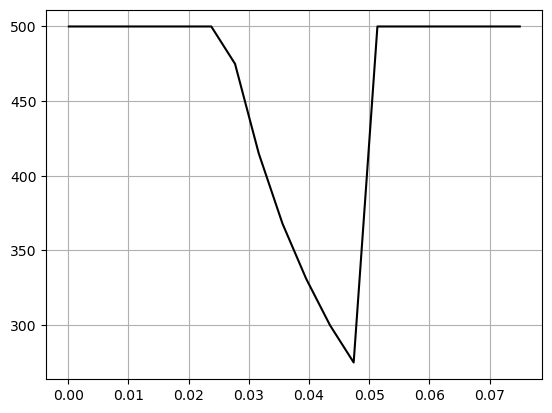

In [243]:
lamb =0.1
alphaa = np.linspace(0.0001,0.075,20)
Nbiter = []
for alpha in alphaa:
    g_den, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)
    Nbiter.append(it)
plt.plot(alphaa,Nbiter,'k-')
plt.grid(True)
plt.show()

Une fois la valeur optimale de alpha trouvée, on cacule la descente de gradient avec $\lambda =0.1$ et $\alpha_{optimal}$:

In [293]:
lamb = 0.1
alpha = 0.046
g_denoise, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)

nombre d'itérations de la descente : 283 | Convergence : True


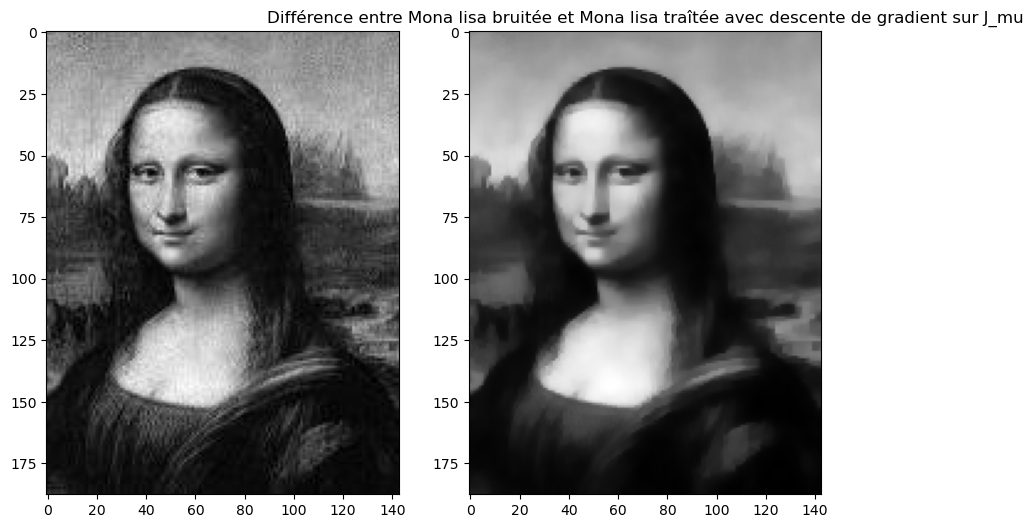

In [245]:
print("nombre d'itérations de la descente :", it, "| Convergence :", cvg)
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
ax1.imshow(g, cmap='gray')
ax2.imshow(g_denoise, cmap='gray')
plt.title('Différence entre Mona lisa bruitée et Mona lisa traîtée avec descente de gradient sur J_mu')
plt.show()

#### Remarques :

L'image après traîtement est bien débruitée, avec une sensation plus lisse que la méthode précédente, sans le flou.

***

#### Question 5 :

#### a)

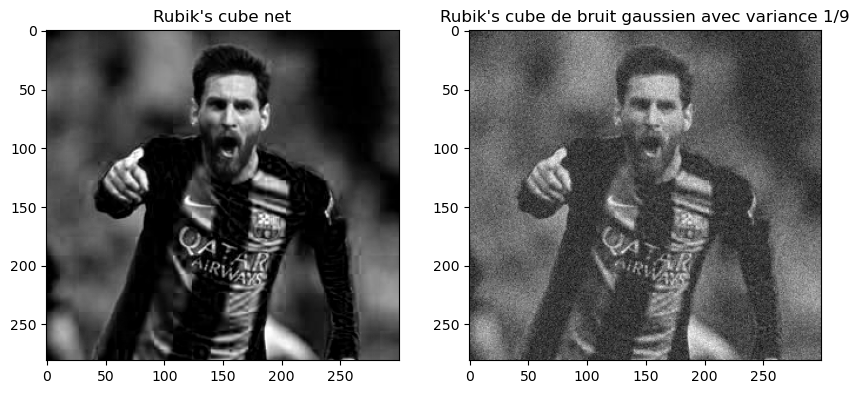

In [262]:
# Pour l'ordi portable

image = imread("C:/Users/Emilio/Documents/Projet master/leo_messi.jpg")

imageArray = np.asarray(image, dtype = np.float64)[:,:,0].copy()/255. #convert to array

g0=imageArray.copy()[:,100:400]
g = g0 + 1/12*np.random.randn(g0.shape[0],g0.shape[1])

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
ax1.imshow(g0, cmap='gray')
ax2.imshow(g, cmap='gray')
ax1.set_title("Rubik's cube net")
ax2.set_title("Rubik's cube de bruit gaussien avec variance 1/9")
plt.show()

#### b)

1ère méthode, implémentation de la descente avec $J$ et grad_J :

In [310]:
lamb=3
M=np.sum(np.abs(np.eye(g.shape[0]) + lamb*delta_x(g).T@delta_x(g)))/m + np.sum(np.abs(lamb*delta_y(g)@delta_y(g).T))/n
alpha=2/M

g_denoise_1, it, cvg = grad_met_im(grad_J, v0, alpha)

Pour lambda = 3 et alpha optimal, on observe : Convergence ? True | Nombre d'itérations : 245


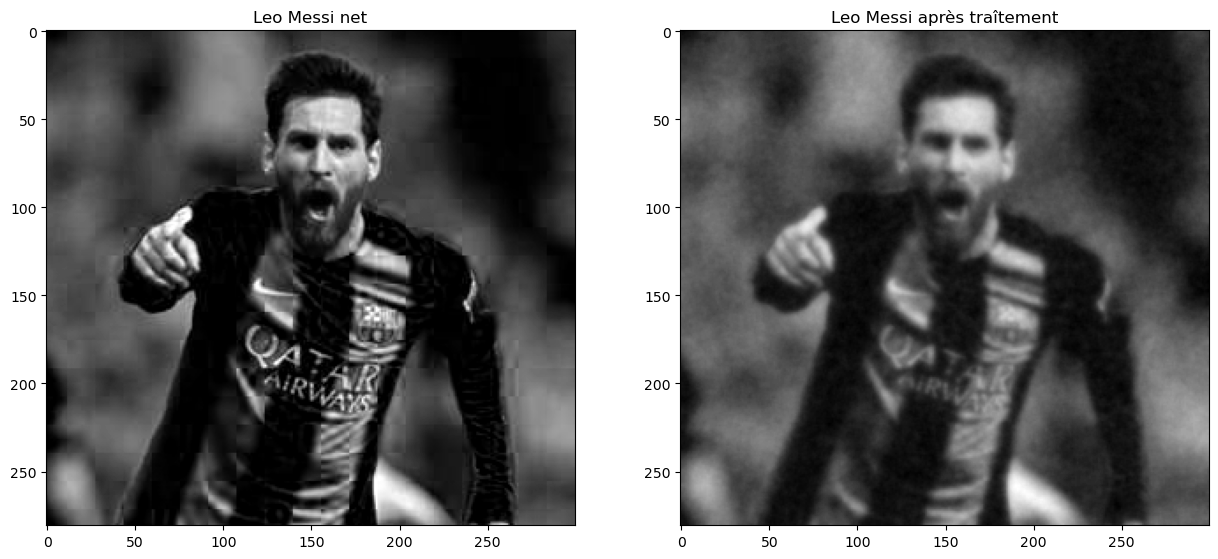

In [311]:
print('Pour lambda =', lamb,'et alpha optimal, on observe :', 'Convergence ?', cvg ,"| Nombre d'itérations :", it)

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,20))

ax2.imshow(g_denoise_1, cmap='gray')
ax1.imshow(g0, cmap='gray')
ax1.set_title("Leo Messi net")
ax2.set_title("Leo Messi après traîtement")
plt.show()

2ère méthode, implémentation de la descente avec $J_{\mu}$ et grad_J_mu : On choisit lambda et alpha comme ceux de Mona Lisa pour simplifier les calculs:

In [305]:
lamb = 0.1
alpha = 0.046
g_denoise_2, it, cvg = grad_met_im_mu(grad_J_mu, v0, alpha)

Pour lambda = 0.1 et alpha optimal, on observe : Convergence ? True | Nombre d'itérations : 291


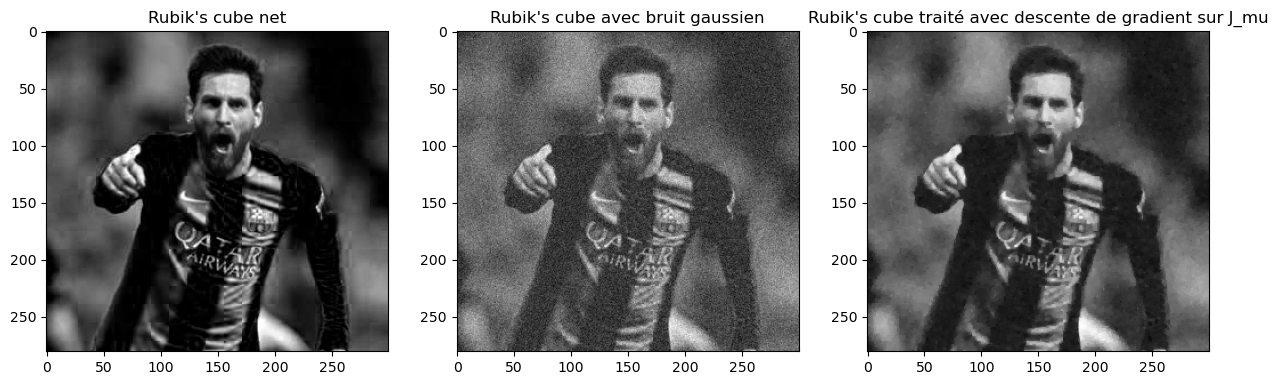

In [306]:
print('Pour lambda =', lamb,'et alpha optimal, on observe :', 'Convergence ?', cvg ,"| Nombre d'itérations :", it)
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=(15,25))
ax1.imshow(g0, cmap='gray')
ax1.set_title("Rubik's cube net")
ax2.imshow(g, cmap='gray')
ax2.set_title("Rubik's cube avec bruit gaussien")
ax3.imshow(g_denoise_2, cmap='gray')
ax3.set_title("Rubik's cube traité avec descente de gradient sur J_mu")
plt.show()

#### c) 

Comparaison entre l'image nette et l'image débruitée avec les deux méthodes: Nous allons observer l'image $|g - g_{denoise}|$: si cette image se rapproche d'une image toute noire (pixel noir codé avec des 0), alors le débruitage aura bien marché.

**Méthode avec $J$**: 

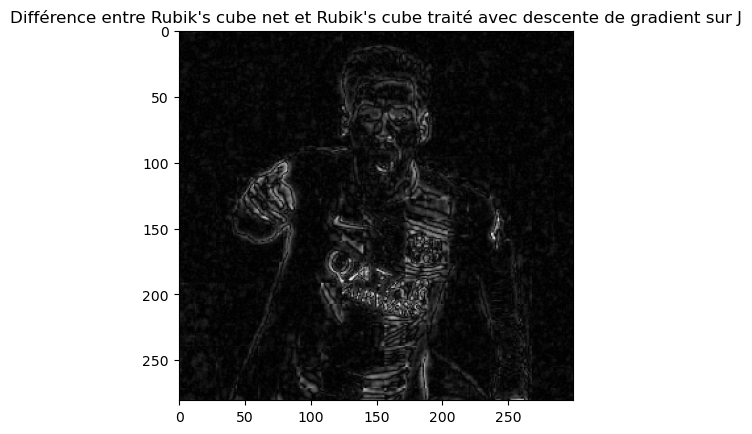

In [307]:
plt.imshow(np.abs(g_denoise_1-g0), cmap='gray')
plt.title("Différence entre Rubik's cube net et Rubik's cube traité avec descente de gradient sur J")
plt.show()

**Méthode avec $J_{\mu}$**:

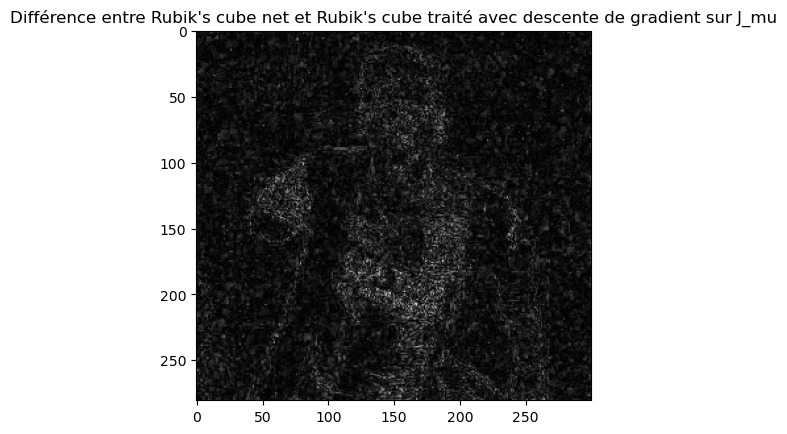

In [308]:
plt.imshow(np.abs(g_denoise_2-g0), cmap='gray')
plt.title("Différence entre Rubik's cube net et Rubik's cube traité avec descente de gradient sur J_mu")
plt.show()

#### d) : remarques

Une remarque commune aux deux méthodes : On remarque que le bruit est en général bien enlevé, le noir pouvant être plus profond avec la méthode avec $J_{\mu}$.
Cependant, au niveau des changements radicaux de couleurs, l'algorithme a du mal à les traîter et donc restent visibles sur les images précédentes.